# MOVIE RECOMMENDATION SYSTEM

# 1. Defining the Question.

## a) Specifying the data analytic question.

> Ichigo is a movie company that wants to expand their horizons and make a recommender system  called MovieLens based on collaborative filtering for thousands of their clients. The recommender system aims to improve user experience by offering personalized movie recommendations catering to each user's preferences.
A better user experience, in turn, increases user satisfaction, engagement, and retention, thus increasing the profitability of the streaming platforms it serves. MovieLens has collected user ratings and movie watch history data on its platform to aid this research.




>  __Problem Statement:__ To build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies.


## b) Defining the metric of success: 
> Having a model that has a low RMSE and a high recall score.

## c) Recording the Experimental Design.

- Research Question: Can a user get 5 movie recommendations based on their ratings of other movies.
- Data source: The MovieLens dataset contains 100,000 ratings, as well as demographic information and movie metadata, collected from 9,000 movies by 600 users. The dataset was collected and made available by GroupLens, a research lab at the University of Minnesota. The purpose of the dataset is to enable research in recommendation systems and related fields.The dataset can be downloaded from the GroupLens website (https://grouplens.org/datasets/movielens/latest/).
- Variables: The variables in the merged data set are:'userId', 'movieId', 'rating', 'title', 'genres', 'year'.
- Model evaluation: The metrics used to evaluate the model's performance are:accuracy,recall and RMSE.
- Conclusions and recommendations.

# 2. Loading the data

In [108]:
#Importing relevant libraries
from collections import Counter
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Reader

In [80]:
# Loading the Datasets
movies= pd.read_csv("ml-latest-small/movies.csv")
links= pd.read_csv("ml-latest-small/links.csv")
ratings= pd.read_csv("ml-latest-small/ratings.csv")
tags= pd.read_csv("ml-latest-small/tags.csv")


In [81]:
#print the number of movies in our dataset.
print(f"Total number of movies are {movies['title'].nunique()}")

Total number of movies are 9737


# 3. Data Understanding

The MovieLens dataset contains 100,000 ratings, as well as demographic information and movie metadata, collected from  9,000 movies by 600 users. The dataset was collected and made available by GroupLens, a research lab at the University of Minnesota. The purpose of the dataset is to enable research in recommendation systems and related fields. 

The dataset can be downloaded from the GroupLens website (https://grouplens.org/datasets/movielens/latest/).

### Movies dataset

In [82]:
#check the first data set info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [83]:
#checking for null values 
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [84]:
#checking for duplicates
movies.duplicated().sum()

0

### Links dataset

In [85]:
#previewing the second dataset
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [86]:
#check the second data set info
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [87]:
#checking for null values in the second data set .
links.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

> The 'tmbId' column had some missing values.

In [88]:
#checking for duplicates in the second data set
links.duplicated().sum()

0

### Ratings dataset

In [89]:
#previewing the third dataset
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [90]:
#checking the data set info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [91]:
#checking for missing values.
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [92]:
#checking for duplicates.
ratings.duplicated().sum()

0

### Tags dataset

In [93]:
#preview the fourth dataset
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [94]:
#check data set info
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [95]:
#checking for missing values
tags.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

# 4. External Data Source Validation

# 5. Data Preprocessing

In [96]:
#merge the data sets(movies & ratings)
#set index 
movie_ratings = pd.merge(ratings, movies, on='movieId', how = 'inner')
movie_ratings.tail()

,userId,movieId,rating,timestamp,title,genres
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller
100835,610,163981,3.5,1493850155,31 (2016),Horror


In [97]:
# Checking for Duplicates
duplicates = movie_ratings.duplicated(subset=['userId', 'movieId'])
print(duplicates.sum())

0


In [98]:
# Verifying number of Users 
print(f"Total number of users are {movie_ratings['userId'].nunique()}")

Total number of users are 610


In [99]:
# Verifying no. of Movies 
print(f"Total number of movies are {movie_ratings['title'].nunique()}")

Total number of movies are 9719


In [100]:
#Dropping the timestamp column
df= movie_ratings.drop(['timestamp'], axis=1)
df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [101]:
#checking for null values in the merged data frame
df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

In [102]:
#checking for duplicates in the merged data frame
df.duplicated().sum()

0

The merged data frame has no duplicates or missing values.

In [103]:
# Separate the Genres Column and Encoding them with One-Hot Encoding
genres = []
for i in range(len(df.genres)):
    for x in df.genres[i].split('|'):
        if x not in genres:
            genres.append(x)
            
len(genres)
for x in genres:
    df[x] = 0
for i in range(len(df.genres)):
    for x in df.genres[i].split('|'):
        df[x][i]=1
        
#dropping the genres column as it's a no longer required
df.drop(columns='genres', inplace=True)
df.sort_index(inplace=True)
df.head()


,userId,movieId,rating,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed)
0,1,1,4.0,Toy Story (1995),1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,Toy Story (1995),1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,Toy Story (1995),1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,Toy Story (1995),1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,Toy Story (1995),1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


This code computes the total number of movies in each genre and plots a bar chart to show the popularity of each genre

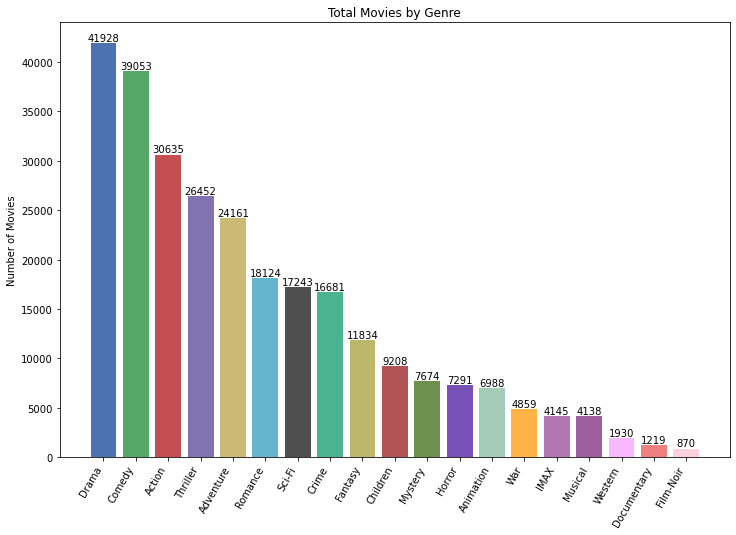

In [28]:
# Create a dictionary to store the total number of movies for each genre
genre_counts = {}
for genre in df.columns[4:23]:#df.columns[4:23] selects all columns with genre information
    genre_counts[genre] = df[genre].sum()

# Sort the genres by popularity
sorted_genres = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)}

# Plot a bar chart of the total movies by genre
plt.figure(figsize=(12, 8))
bars = plt.bar(x=sorted_genres.keys(), height=sorted_genres.values(), color=['#4C72B0','#55A868','#C44E52','#8172B2','#CCB974','#64B5CD','#4F4F4F','#4CB391','#BDB76B','#B15455','#6D904F','#7851B8','#A5CCB8','#FFB347','#B276B2','#9F5F9F','#F9B7FF','#F08080','#FFD1DC','#F08080'])

# Add labels to the bars with the total number of movies for each genre
for i, bar in enumerate(bars):
    plt.text(x=i, y=bar.get_height(), s=bar.get_height(), ha='center', va='bottom')

# Customize the plot
plt.xticks(rotation=60, ha='right')
plt.ylabel('Number of Movies')
plt.title('Total Movies by Genre')

plt.show()


> As shown,Drama genre has the highest number of movies while Film Noir has the least.

> For better analysis,the genre column is split and encoded.

In [29]:
# Group the movie_ratings DataFrame by movie title and calculate the average rating
avg_ratings = df.groupby('title')['rating'].mean().sort_values(ascending=False)
avg_ratings

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

In [30]:
# Grouping by the total no. of rating of the movies
rat_count = df.groupby('title')['rating'].count().sort_values(ascending=False)
rat_count

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
                                                                                 ... 
Late Night Shopping (2001)                                                          1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Shift, The (1996)                                                              1
Latter Days (2003)                                                                  1
'71 (2014)                                                                          1
Name: rating, Length: 9719, dtype: int64

In [31]:
#Stripping the title to extract the year of release.
df['year'] = df['title'].str.extract('.*\((.*)\).*',expand = False)
df.tail()

,userId,movieId,rating,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed),year
100831,610,160341,2.5,Bloodmoon (1997),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
100832,610,160527,4.5,Sympathy for the Underdog (1971),0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1971
100833,610,160836,3.0,Hazard (2005),0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2005
100834,610,163937,3.5,Blair Witch (2016),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016
100835,610,163981,3.5,31 (2016),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016


In [32]:
# replacing the range with a specific year
df['year'] = df['year'].replace("2006–2007","2007")

In [33]:
df.columns

Index(['userId', 'movieId', 'rating', 'title', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Fantasy', 'Romance', 'Action', 'Crime',
       'Thriller', 'Mystery', 'Horror', 'Drama', 'War', 'Western', 'Sci-Fi',
       'Musical', 'Film-Noir', 'IMAX', 'Documentary', '(no genres listed)',
       'year'],
      dtype='object')

# 6. Exploratory Data Analysis.

## Univariate Analysis

In [34]:
# previewing descriptive statistics of the data set.
df.describe()

,userId,movieId,rating,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,...,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary,(no genres listed)
count,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,...,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557,0.239607,0.069301,0.091317,0.387292,0.117359,0.179737,0.303810,...,0.072306,0.415804,0.048187,0.019140,0.171000,0.041037,0.008628,0.041106,0.012089,0.000466
std,182.618491,35530.987199,1.042529,0.426846,0.253966,0.288060,0.487134,0.321849,0.383970,0.459904,...,0.258994,0.492862,0.214163,0.137018,0.376511,0.198377,0.092485,0.198537,0.109284,0.021585
min,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,177.000000,1199.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,325.000000,2991.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,477.000000,8122.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,610.000000,193609.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# check merged data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              100836 non-null  int64  
 1   movieId             100836 non-null  int64  
 2   rating              100836 non-null  float64
 3   title               100836 non-null  object 
 4   Adventure           100836 non-null  int64  
 5   Animation           100836 non-null  int64  
 6   Children            100836 non-null  int64  
 7   Comedy              100836 non-null  int64  
 8   Fantasy             100836 non-null  int64  
 9   Romance             100836 non-null  int64  
 10  Action              100836 non-null  int64  
 11  Crime               100836 non-null  int64  
 12  Thriller            100836 non-null  int64  
 13  Mystery             100836 non-null  int64  
 14  Horror              100836 non-null  int64  
 15  Drama               100836 non-nul

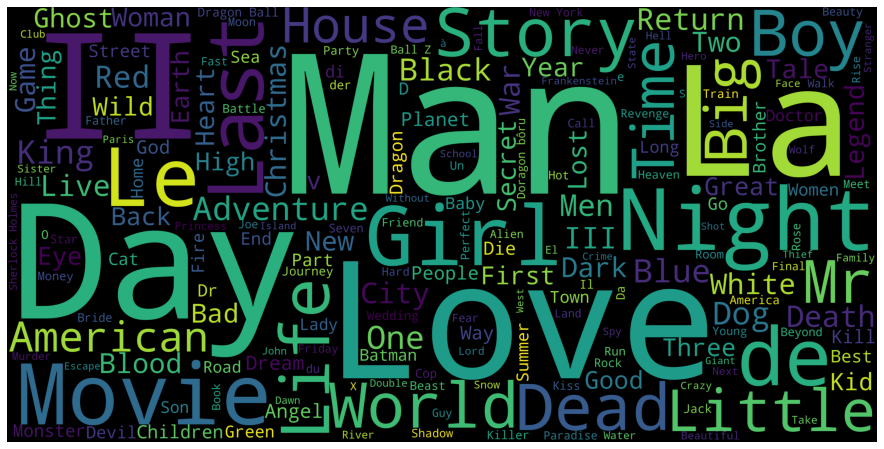

In [36]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

### Ratings

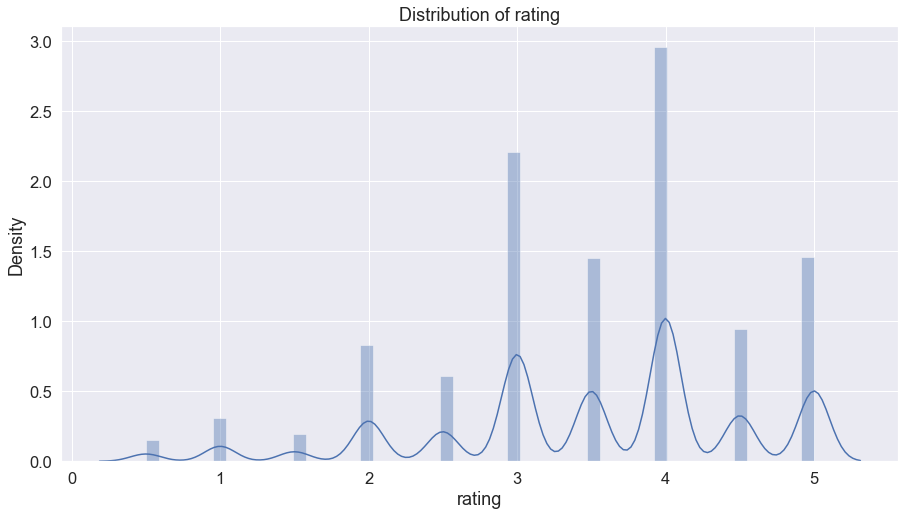

In [37]:
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))
plt.title('Distribution of rating');

> Almost 50% of the movies have a rating of between 4 and 5.

### Genres

In [38]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596]]

> The top 5 genres are: Drama,comedy,thriller,Action and Romance respectively.This will be represented with a word cloud.

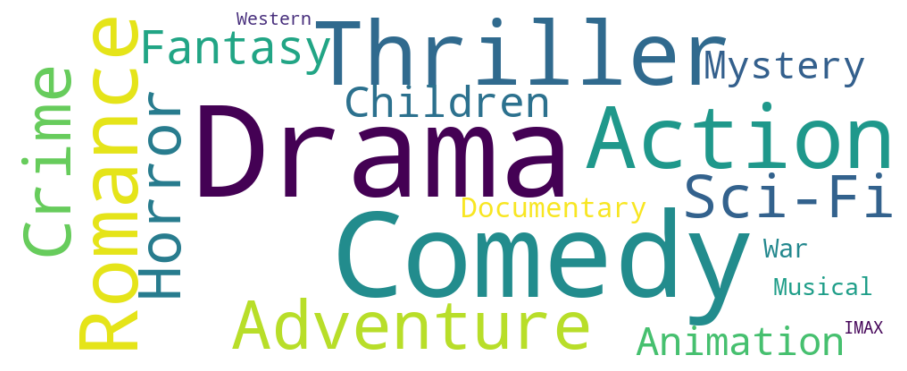

In [105]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

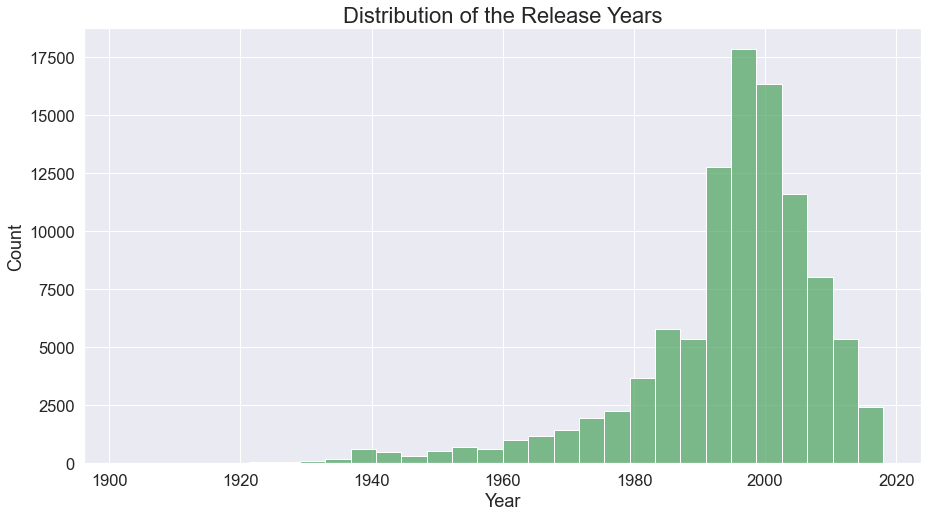

In [40]:
#plot distribution of release years
df['year'] = pd.to_numeric(df['year'])
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='year', bins=30, color = 'g')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Count', fontsize = 18)
plt.title('Distribution of the Release Years',fontsize = 22);


> Most movies were released between 1990 and 2000.

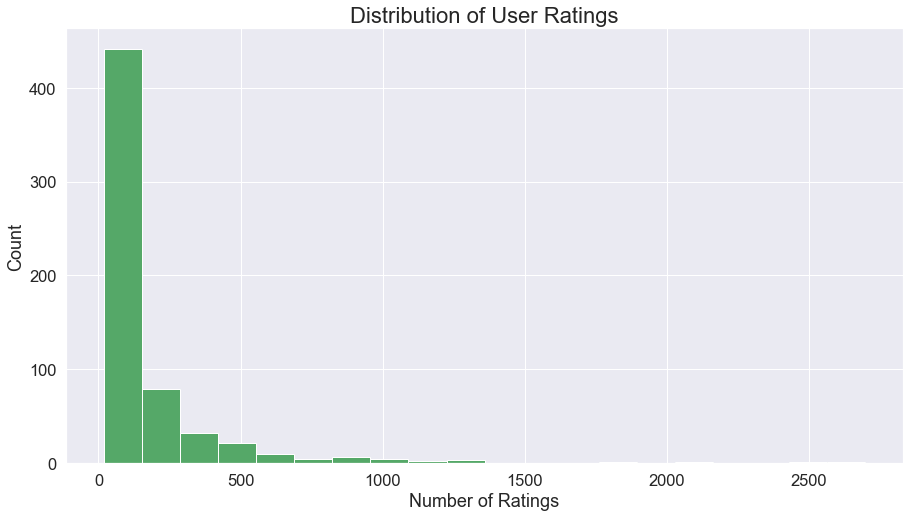

In [41]:
# Group ratings by user ID and count the number of ratings for each user
user_ratings = df.groupby('userId')['rating'].count()

# histogram of number of ratings per user
plt.figure(figsize=(15,8))
plt.hist(user_ratings, bins=20, color = 'g')
plt.xlabel('Number of Ratings', fontsize=18 )
plt.ylabel('Count', fontsize=18)
plt.title('Distribution of User Ratings', fontsize=22)
plt.show()

> The distribution of users making ratings is not normal.

## Bivariate Analysis

In [42]:
period_length = 20
start_year = 1940
end_year = 2019
df = df[(df['year'] >= 1940) & (df['year'] <= 2019)]

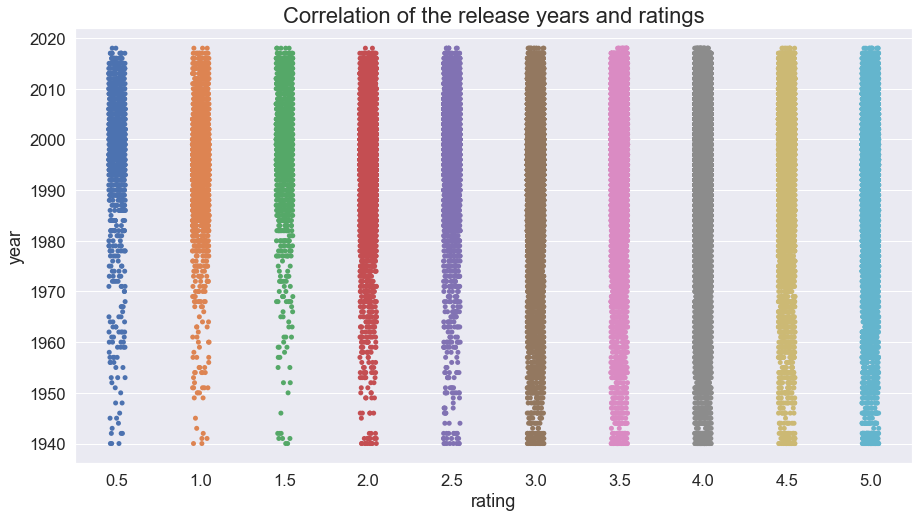

In [43]:
#correlation between rating and year of production
plt.figure(figsize=(15, 8))
plt.xlabel('Ratings', fontsize=18)
plt.ylabel('Year', fontsize=18)
plt.title('Correlation of the release years and ratings', fontsize =22)
sns.stripplot(data=df,x='rating',y='year');

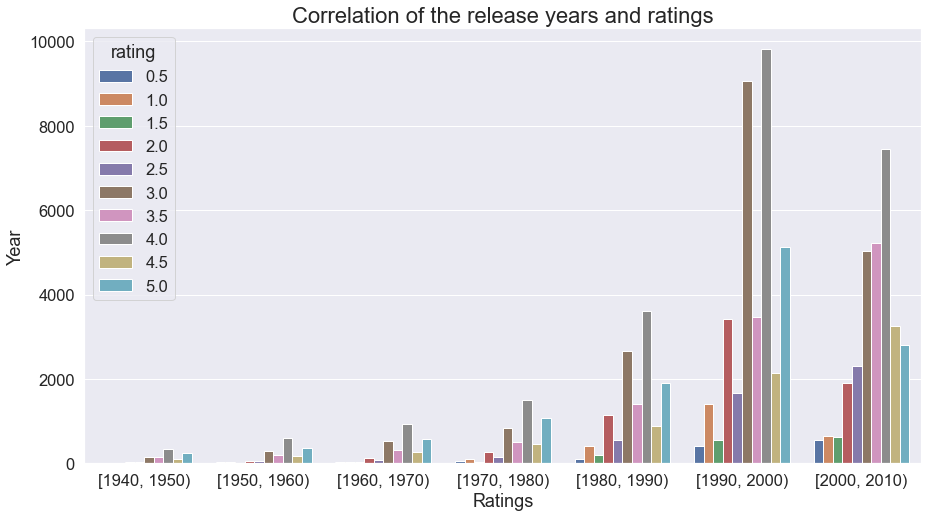

In [44]:
#correlation between year of release and rating
df_extra = df.copy()
df_extra['year'] = pd.cut(df_extra['year'], range(1940, 2019, 10), right=False)
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df_extra, x='year', hue='rating')
plt.xlabel('Ratings', fontsize=18)
plt.ylabel('Year', fontsize=18)
plt.title('Correlation of the release years and ratings', fontsize=22)
ax;

> Most ratings were given by users from the year 1990 to 2000

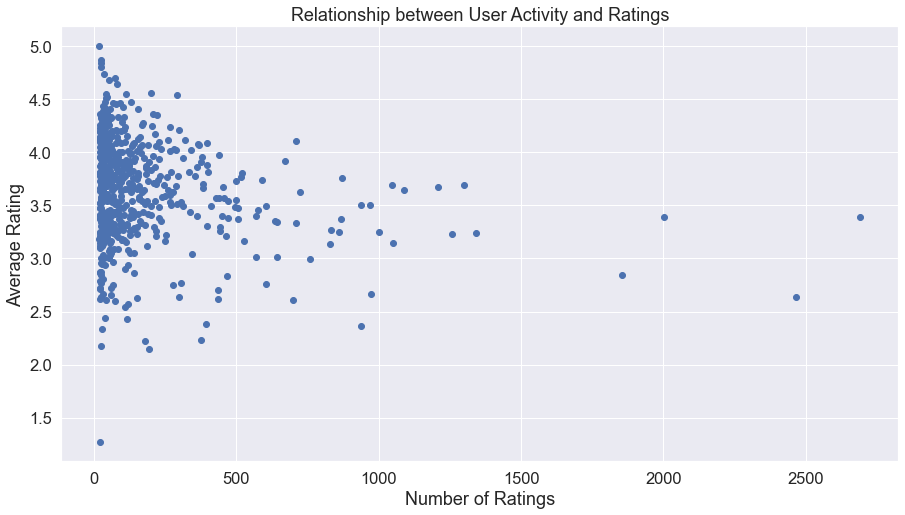

In [45]:
# Calculate average rating and number of ratings per user
user_ratings = df.groupby('userId').agg({'rating': ['mean', 'count']})
user_ratings.columns = ['avg_rating', 'num_ratings']

# Create scatter plot of average rating vs. number of ratings per user
plt.figure(figsize=(15,8))
plt.scatter(user_ratings['num_ratings'], user_ratings['avg_rating'])
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.title('Relationship between User Activity and Ratings')
plt.show()


> As seen,the average rating would increase if it were watched by less people and vice versa.

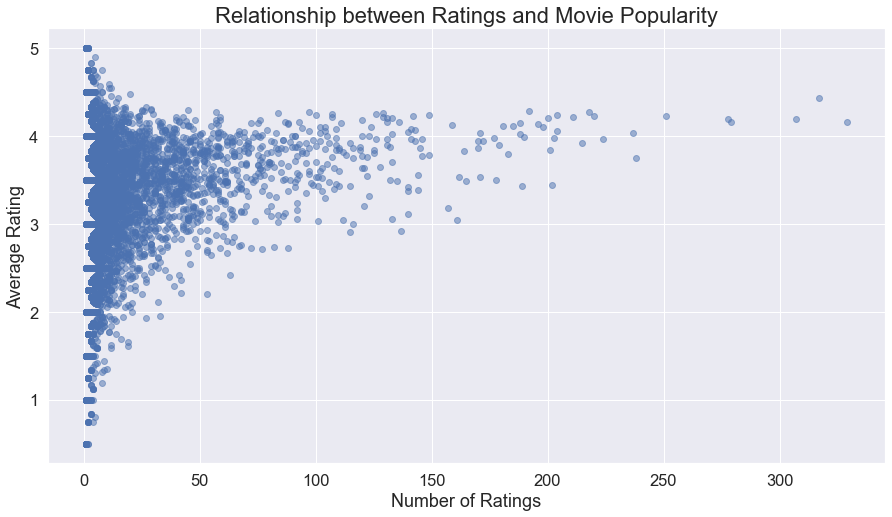

In [46]:
import matplotlib.pyplot as plt

# create a dataframe containing the average rating and number of ratings for each movie
movie_stats = ratings.groupby('movieId').agg({'rating': [np.mean, np.size]})

# flatten the column names and reset the index
movie_stats.columns = movie_stats.columns.get_level_values(1)
movie_stats.reset_index(inplace=True)

# create a scatter plot of average rating vs number of ratings
plt.figure(figsize=(15,8))
plt.scatter(x=movie_stats['size'], y=movie_stats['mean'], alpha=0.5)
ax.plot(x,color="orange")

# set x-axis and y-axis labels
plt.xlabel('Number of Ratings', fontsize = 18)
plt.ylabel('Average Rating', fontsize = 18)

# set title
plt.title('Relationship between Ratings and Movie Popularity', fontsize = 22)

# show the plot
plt.show()


> There is a weak positive correlation seen between average rating and number of ratings.

Add the num_rating and average_rating per movie. The information helps decide the most popular movies.

In [47]:
#get number average rating and number of rating per movie.
mean_rating = df.groupby('movieId').rating.mean().rename('mean rating')
num_rating = df.groupby('movieId').userId.count().rename('num rating')

df = pd.merge(df, mean_rating, how='left', on='movieId')
df = pd.merge(df, num_rating, how='left', on='movieId')


df[['title', 'mean rating', 'num rating']]

,title,mean rating,num rating
0,Toy Story (1995),3.92093,215
1,Toy Story (1995),3.92093,215
2,Toy Story (1995),3.92093,215
3,Toy Story (1995),3.92093,215
4,Toy Story (1995),3.92093,215
...,...,...,...
99986,Bloodmoon (1997),2.50000,1
99987,Sympathy for the Underdog (1971),4.50000,1
99988,Hazard (2005),3.00000,1
99989,Blair Witch (2016),3.50000,1


## Popularity based Recommendation System

The popularity based recommender system will act as the baseline model, helpful for new users. It will recommend to them the 10 top-rated movies.

In [48]:
movie_popularity = df[['title', 'mean rating', 'num rating']]
movie_popularity.tail()

,title,mean rating,num rating
99986,Bloodmoon (1997),2.5,1
99987,Sympathy for the Underdog (1971),4.5,1
99988,Hazard (2005),3.0,1
99989,Blair Witch (2016),3.5,1
99990,31 (2016),3.5,1


In [49]:
movie_popularity.sort_values(by=['num rating'], ascending=False).head(10)

,title,mean rating,num rating
2500,Forrest Gump (1994),4.164134,329
2624,Forrest Gump (1994),4.164134,329
2611,Forrest Gump (1994),4.164134,329
2612,Forrest Gump (1994),4.164134,329
2613,Forrest Gump (1994),4.164134,329
2614,Forrest Gump (1994),4.164134,329
2615,Forrest Gump (1994),4.164134,329
2616,Forrest Gump (1994),4.164134,329
2617,Forrest Gump (1994),4.164134,329
2618,Forrest Gump (1994),4.164134,329


It appears that there are multiple entries of the same movie title. These duplicates are dropped below:

In [50]:
movie_popularity = movie_popularity.drop_duplicates(subset=['title'])


In [51]:
movie_popularity.sort_values(by=['num rating'], ascending=False).head(10)

,title,mean rating,num rating
2426,Forrest Gump (1994),4.164134,329
16081,"Shawshank Redemption, The (1994)",4.429022,317
1819,Pulp Fiction (1994),4.197068,307
4310,"Silence of the Lambs, The (1991)",4.161290,279
12450,"Matrix, The (1999)",4.192446,278
1568,Star Wars: Episode IV - A New Hope (1977),4.231076,251
3188,Jurassic Park (1993),3.750000,238
854,Braveheart (1995),4.031646,237
26454,Terminator 2: Judgment Day (1991),3.970982,224
3570,Schindler's List (1993),4.225000,220


In [52]:
#most popular movies by mean ratings

movie_popularity.sort_values(by=['mean rating'], ascending=False).head(10)

,title,mean rating,num rating
97662,Peaceful Warrior (2006),5.0,1
88215,Rivers and Tides (2001),5.0,1
96127,"Dream of Light (a.k.a. Quince Tree Sun, The) (...",5.0,1
96137,Enter the Void (2009),5.0,2
93400,Madame Sousatzka (1988),5.0,1
96146,Zeitgeist: Moving Forward (2011),5.0,1
96149,Connections (1978),5.0,1
99143,Knock Off (1998),5.0,1
18610,Alien Contamination (1980),5.0,1
18597,Galaxy of Terror (Quest) (1981),5.0,1


Although these movies are popular they only have one rating. Thus, the popularity isnot reliable as it may change as the number of ratings increase.

The threshhold for popularity is set to 150.

In [53]:
popularity_threshold = 150
movie_popularity[movie_popularity['num rating']>popularity_threshold].sort_values(by=['mean rating'], ascending=False).head(10)


,title,mean rating,num rating
16081,"Shawshank Redemption, The (1994)",4.429022,317
45020,"Godfather, The (1972)",4.289062,192
14108,Fight Club (1999),4.272936,218
572,"Usual Suspects, The (1995)",4.237745,204
1568,Star Wars: Episode IV - A New Hope (1977),4.231076,251
3570,Schindler's List (1993),4.225000,220
6659,Star Wars: Episode V - The Empire Strikes Back...,4.215640,211
7012,Raiders of the Lost Ark (Indiana Jones and the...,4.207500,200
1819,Pulp Fiction (1994),4.197068,307
12450,"Matrix, The (1999)",4.192446,278


The above movies are not only popular but also loved by the users. 

The scatter plot below examines whether there's a correlation between number of ratings and average ratings. It shows whether movies that are highly rated are indeed watched by more people.

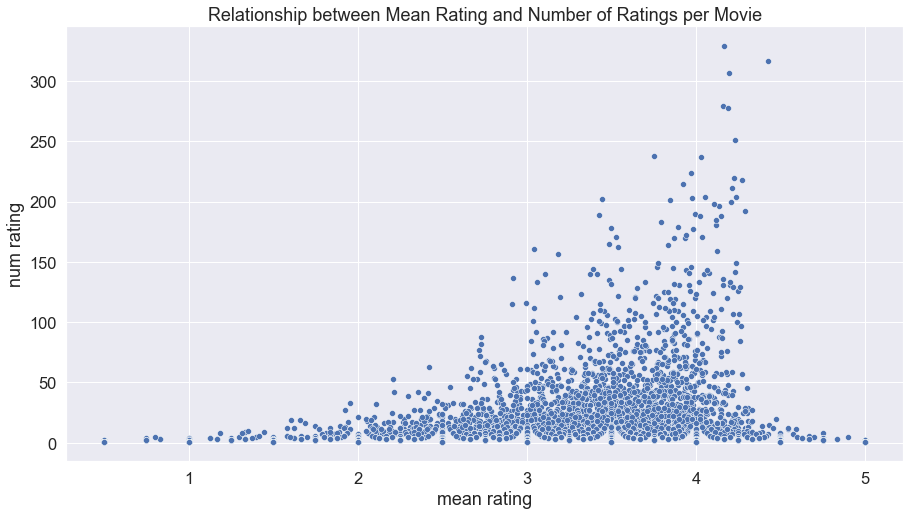

In [107]:
#scatterplot of mean rating and number of ratings
plt.figure(figsize=(15,8))
sns.scatterplot(data=movie_popularity, x='mean rating', y ='num rating')
plt.title('Relationship between Mean Rating and Number of Ratings per Movie');
#plt.savefig('Images/mean_num_rating')


The scatterplot shows that there is indeed a positive relationship between number of ratings and the mean rating. 

Movies that are highly rated are watched by more people. Probably because they are a good watch.

A new user maybe specific and search for a very specific genre, say drama.

In [55]:
#check users who are interested in drama
user_genre ='Drama'
movie_popularity[df[user_genre] == 1].sort_values(by=['mean rating'], ascending=False).head(10)

,title,mean rating,num rating
97121,"Thousand Clowns, A (1965)",5.0,1
95587,Come and See (Idi i smotri) (1985),5.0,2
87942,Front of the Class (2008),5.0,1
92581,"Son of the Bride (Hijo de la novia, El) (2001)",5.0,1
96137,Enter the Void (2009),5.0,2
87913,Sisters (Syostry) (2001),5.0,1
95596,Che: Part One (2008),5.0,1
98412,Lady Jane (1986),5.0,1
96127,"Dream of Light (a.k.a. Quince Tree Sun, The) (...",5.0,1
96493,King of Hearts (1966),5.0,1


Set a popularity threshold just like above.

In [56]:
# Set the genre of interest
user_genre = 'Drama'

# Set the minimum number of ratings required for a movie to be considered popular
popularity_threshold = 150

# Select the top 10 highest rated movies in the specified genre that meet the popularity threshold
movie_popularity[(df[user_genre] == 1) & (df['num rating']>popularity_threshold)].sort_values(by=['mean rating'], ascending=False).head(10)


,title,mean rating,num rating
16081,"Shawshank Redemption, The (1994)",4.429022,317
45020,"Godfather, The (1972)",4.289062,192
14108,Fight Club (1999),4.272936,218
3570,Schindler's List (1993),4.225000,220
1819,Pulp Fiction (1994),4.197068,307
2426,Forrest Gump (1994),4.164134,329
10611,Saving Private Ryan (1998),4.146277,188
37607,"Lord of the Rings: The Return of the King, The...",4.118919,185
4649,Fargo (1996),4.116022,181
13637,American Beauty (1999),4.056373,204


## Final Baseline Model(New User) 

The final baseline model for new users combines all the above:
* If no information is provided, the user is recommended the popular movies rated than 150 times(which have been rated at least 150 times).
* If the user presents a threshold, say, top 10, then the user gets the top 10 movies with highest ratings.
* If the user presents a genre, then the user is recommended top-rated movies from that genre. 

In [57]:
import ipywidgets as widgets
from IPython.display import display

# Function to recommend movies based on a given threshold and favorite genre
def baseline_model(threshold, fav_genre):
    minimum_num_ratings = threshold
    if fav_genre == 'All':
        result = movie_popularity[(df['num rating'] > minimum_num_ratings)].sort_values(by=['mean rating'], ascending=False).head(10)
    else:
        result = movie_popularity[(df[fav_genre] == 1) & (df['num rating'] > minimum_num_ratings)].sort_values(by=['mean rating'], ascending=False).head(10)

    print('\n\nThese are the recommendations for the users with the following filters')
    print('Minimum number of ratings:', threshold)
    print("User's choice of genre:", fav_genre)
    display(result)

# List of genres to be used in the interactive widget
genres = ['All',
          'Animation',
          'Children',
          'Comedy',
          'Fantasy',
          'Romance',
          'Drama',
          'Action',
          'Crime',
          'Thriller',
          'Horror',
          'Mystery',
          'Sci-Fi',
          'War',
          'Musical',
          'Documentary',
          'IMAX',
          'Western',
          'Film-Noir']

# Interactive widget for users to select their preferred genre and minimum number of ratings
w = widgets.interactive(baseline_model, threshold=widgets.IntSlider(min=0, max=200, value=100, step=5),
                       fav_genre=widgets.Dropdown(options=genres, description="Genre"))
display(w)


interactive(children=(IntSlider(value=100, description='threshold', max=200, step=5), Dropdown(description='Ge…

In [59]:
# Define the format of the dataframe
reader = Reader(rating_scale=(0.5, 5.0))

# Convert your dataframe to a Surprise dataset
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

#generating a trainset
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9531


In [60]:
# knn algoritms
print('KNN_BASIC')
print('*************************************************************************')

cv_knn_basic = cross_validate(KNNBasic(), data, cv=5, n_jobs=5, verbose=True)

print('KNN_MEANS')
print('*************************************************************************')


cv_knn_means = cross_validate(KNNWithMeans(), data, cv=5, n_jobs=5, verbose=True)

KNN_BASIC
*************************************************************************
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9531  0.9527  0.9448  0.9361  0.9510  0.9475  0.0064  
MAE (testset)     0.7296  0.7289  0.7239  0.7190  0.7301  0.7263  0.0043  
Fit time          0.12    0.13    0.10    0.12    0.10    0.11    0.01    
Test time         2.21    2.18    2.19    2.12    2.13    2.16    0.03    
KNN_MEANS
*************************************************************************
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8953  0.9050  0.8986  0.8891  0.8956  0.8967  0.0052  
MAE (testset)     0.6840  0.6935  0.6860  0.6782  0.6854  0.6854  0.0049  
Fit time          0.11    0.12    0.13    0.13    0.12    0.12    0.01    
Test time         2.18    2.20    2

In [61]:
#svd
print('SVD')
print('*************************************************************************')

cv_svd = cross_validate(SVD(), data, cv=5, n_jobs=5, verbose=True)

SVD
*************************************************************************
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8700  0.8715  0.8812  0.8738  0.8720  0.8737  0.0040  
MAE (testset)     0.6691  0.6681  0.6743  0.6707  0.6715  0.6707  0.0021  
Fit time          9.23    9.24    9.23    9.25    9.18    9.23    0.02    
Test time         0.22    0.22    0.22    0.18    0.17    0.20    0.02    


In [62]:
#summary of SVD and KNN results
print('Evaluation Results:')
print('Algoritm\t RMSE\t\t MAE')
print()


print('KNN Basic', '\t', round(cv_knn_basic['test_rmse'].mean(), 4), '\t\t', round(cv_knn_basic['test_mae'].mean(), 4))
print('KNN Means', '\t', round(cv_knn_means['test_rmse'].mean(), 4), '\t', round(cv_knn_means['test_mae'].mean(), 4))
print()
print('SVD', '\t\t', round(cv_svd['test_rmse'].mean(), 4), '\t', round(cv_svd['test_mae'].mean(), 4))

Evaluation Results:
Algoritm	 RMSE		 MAE

KNN Basic 	 0.9475 		 0.7263
KNN Means 	 0.8967 	 0.6854

SVD 		 0.8737 	 0.6707


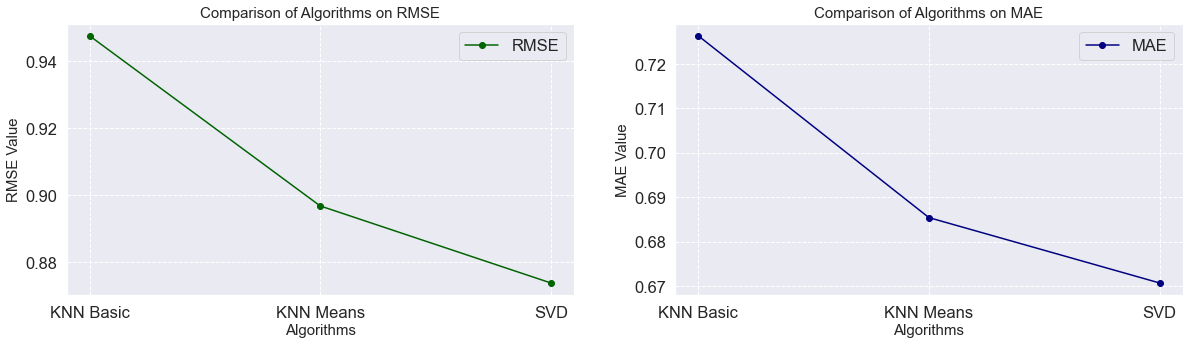

In [63]:
#compare accuracy of each algorithm


# Plotting graphs for comparing accuracy of each algo
x_algo = ['KNN Basic', 'KNN Means', 'SVD']
all_algos_cv = [cv_knn_basic, cv_knn_means, cv_svd]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

# RMSE graph
plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

# MAE graph
plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')
#plt.savefig('Images/RMSE_MAE')
plt.show()

KNN means appear to be doing the best. Optimize KNN Means models based on two hyperparameter: number of neighbors and distance metric.

In [64]:
param_grid = {'k': [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100]}

gs_knn_means = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
gs_knn_means.fit(data)

y1 = gs_knn_means.cv_results['mean_test_rmse']
y2 = gs_knn_means.cv_results['mean_test_mae']

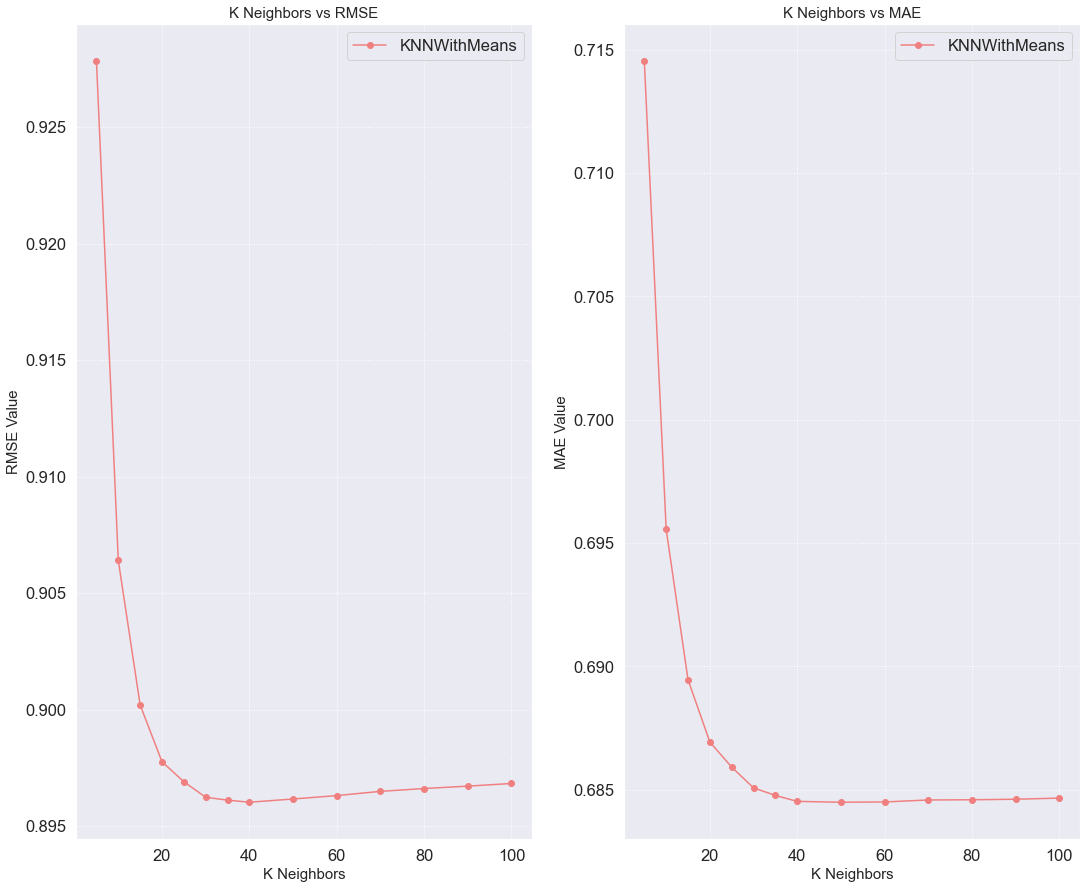

In [65]:
import os

# create the Images directory
if not os.path.exists('Images'):
    os.makedirs('Images')

# plotting accuracies for comparison
plt.figure(figsize = (18, 15))

x = [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100]

plt.subplot(1, 2, 1)
plt.title('K Neighbors vs RMSE', loc='center', fontsize=15)
plt.plot(x, y1, label='KNNWithMeans', color='lightcoral', marker='o')
plt.xlabel('K Neighbors', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.subplot(1, 2, 2)
plt.title('K Neighbors vs MAE', loc='center', fontsize=15)
plt.plot(x, y2, label='KNNWithMeans', color='lightcoral', marker='o')
plt.xlabel('K Neighbors', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

# save the figure to a file in the Images directory
plt.savefig('Images/K-Neighbor vs RMSE.png')
plt.show()


Optimal k is at 20. Check to see best distance metrics out of pearson, cosine, msd, and pearson baseline.

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8988  0.9071  0.8982  0.9146  0.8950  0.9027  0.0072  
MAE (testset)     0.6895  0.6943  0.6927  0.7001  0.6862  0.6926  0.0047  
Fit time          0.39    0.41    0.44    0.44    0.43    0.42    0.02    
Test time         2.05    2.09    2.09    2.08    2.05    2.07    0.02    
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8977  0.9036  0.8954  0.8941  0.8997  0.8981  0.0033  
MAE (testset)     0.6851  0.6881  0.6811  0.6827  0.6865  0.6847  0.0025  
Fit time          0.81    0.86    0.86    0.83    0.68    0.81    0.07    
Test time         2.18    2.25    2.22    2.15    2.21    2.20    0.03    
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mea

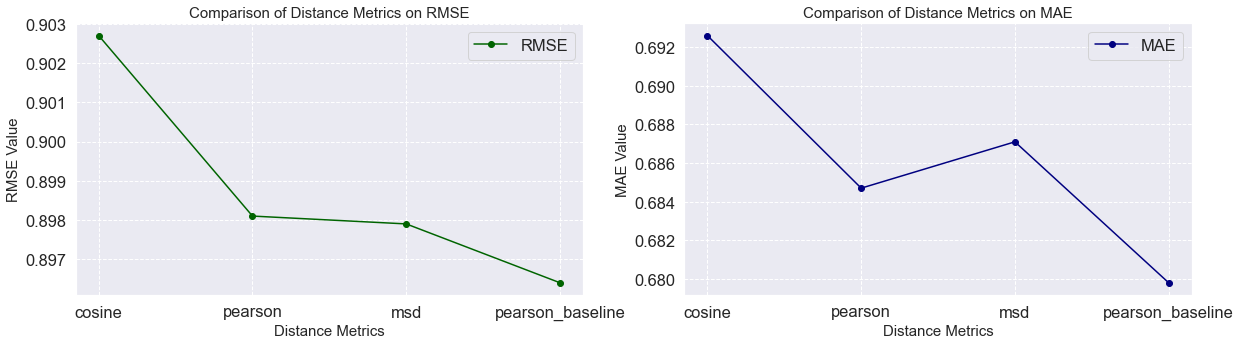

In [66]:
# comparing distance matrix

knn_means_cosine = cross_validate(KNNWithMeans(k=20, sim_options={'name':'cosine'}), data, cv=5, n_jobs=5, verbose=True)
knn_means_pearson = cross_validate(KNNWithMeans(k=20, sim_options={'name':'pearson'}), data, cv=5, n_jobs=5, verbose=True)
knn_means_msd = cross_validate(KNNWithMeans(k=20, sim_options={'name':'msd'}), data, cv=5, n_jobs=5, verbose=True)
knn_means_pearson_baseline = cross_validate(KNNWithMeans(k=20, sim_options={'name':'pearson_baseline'}), data, cv=5, n_jobs=5, verbose=True)


x_distance = ['cosine', 'pearson', 'msd', 'pearson_baseline',]
all_distances_cv = [knn_means_cosine, knn_means_pearson, knn_means_msd, knn_means_pearson_baseline]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_distances_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_distances_cv]

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Distance Metrics on RMSE', loc='center', fontsize=15)
plt.plot(x_distance, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Distance Metrics', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Distance Metrics on MAE', loc='center', fontsize=15)
plt.plot(x_distance, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Distance Metrics', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')
plt.savefig('Images/Comparison_of_Distance_metrics')
plt.show()

Based on hyperparameter tuning above, best is KNN-Means with pearson_baseline similarity where k is 20. The RMSE is =...... and MAE is =............. (read from graphs above).

Use gridsearch to optimize SVD model for number of epochs, regularization, and learning rate. 

In [67]:
#Parameter space
svd_param_grid = {'n_epochs': [20, 25, 30, 40, 50],
                  'lr_all': [0.007, 0.009, 0.01, 0.02],
                  'reg_all': [0.02, 0.04, 0.1, 0.2]}

# This will take 20 to 30 minutes.
gs_svd = GridSearchCV(SVD, svd_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
gs_svd.fit(data)

print('Best value for SVD  -RMSE:', round(gs_svd.best_score['rmse'], 4), '; MAE:', round(gs_svd.best_score['mae'], 4))
print('Optimal params RMSE =', gs_svd.best_params['rmse'])
print('optimal params MAE =', gs_svd.best_params['mae'])


Best value for SVD  -RMSE: 0.8508 ; MAE: 0.651
Optimal params RMSE = {'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.1}
optimal params MAE = {'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.1}


## Test Predictions

Evaluate to see if the KNN and SVD models above are working as expected and choose the best.

In [68]:
# fit knn_means model on training set
dataset = data.build_full_trainset()
final_knn_model = KNNWithMeans(k=20, sim_options={'name': 'pearson_baseline'})
final_knn_model.fit(dataset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [69]:
#fit svd model on training set
final_svd_model = SVD(n_epochs=50, lr_all=0.02, reg_all=0.1)
final_svd_model.fit(dataset)

Below is a dataframe showing an overview of 20 movies watched by random users.

In [70]:
# Specify the user ID for which you want to get the list of watched movies
user_id = 123

# Create a dataframe of all movies watched by the user
watched_movies_df = df[df['userId'] == user_id][['movieId', 'title', 'rating']]
watched_movies_df.head(20)


,movieId,title,rating
412,47,Seven (a.k.a. Se7en) (1995),4.5
1621,260,Star Wars: Episode IV - A New Hope (1977),4.5
1881,296,Pulp Fiction (1994),4.0
4367,593,"Silence of the Lambs, The (1991)",4.0
6701,1196,Star Wars: Episode V - The Empire Strikes Back...,4.0
11717,2329,American History X (1998),4.5
12506,2571,"Matrix, The (1999)",4.0
13670,2858,American Beauty (1999),3.5
14143,2959,Fight Club (1999),4.5
16148,318,"Shawshank Redemption, The (1994)",4.0


User 123 watched Star Wars: Episode IV - A New Hope (1977) and  Star Wars: Episode V - The Empire Strikes Back. They rated Episode V 4.0 stars. 

Next, evaluate how well both models work to predict the rating for Star Wars: Episode V - The Empire Strikes Back for this user.  

In [71]:
#svd model predictions on movieid 1196 and userid 123
final_svd_model.predict(uid=123, iid=1196)

Prediction(uid=123, iid=1196, r_ui=None, est=3.959947835835275, details={'was_impossible': False})

In [72]:
#knn model predictions on movieid 1196 and userid 123
final_knn_model.predict(uid=123, iid=1196)

Prediction(uid=123, iid=1196, r_ui=None, est=4.093185299091974, details={'actual_k': 20, 'was_impossible': False})

The estimated movie rating for the above user is indicated under est. From the above, the performance of both models is good for both models but the best model is one with the lowest MASE amd RMSE, which is SVD with RMSE: 0.8497 and MAE: 0.6512

## Final Model(Collaborative-Filtering)

The below function takes the given user id as function, computes their expected ratings for all the movies and outputs a list of the top 5 movies with highest expected ratings.

Next, it filters movies the user has already watched and asks the user to mention the genre they like and specify a threshold for the preferred minimum number of ratings.

In [73]:
def get_movie_recommendations(user_id, preferred_genre='all', minimum_num_ratings=50):
    
    new_df = df.copy()
    
    # filtering out by genre
    if preferred_genre != 'all':
        new_df = new_df[new_df[preferred_genre] == 1]
    
    # filtering out by number of ratings
    new_df = new_df[new_df['num rating'] >= minimum_num_ratings]
    
    # filtering out all movies already rated by user
    movies_already_watched = set(new_df[new_df['userId'] == user_id].movieId.values)
    new_df = new_df[~new_df['movieId'].isin(movies_already_watched)]
    
    # finding expected ratings for all remaining movies in the dataset
    all_movie_ids = set(new_df['movieId'].values)
    all_movie_ratings = []
    
    for i in all_movie_ids:
        expected_rating = final_svd_model.predict(uid=user_id, iid=i).est
        all_movie_ratings.append((i, round(expected_rating, 1)))
        
    # extracting top five movies by expected rating
    expected_df = pd.DataFrame(all_movie_ratings, columns=['movieId', 'Expected Rating'])
    result_df = pd.merge(expected_df, df[['movieId', 'title', 'num rating']], on='movieId')
    result_df = result_df.groupby('title').agg({'Expected Rating': 'mean', 'num rating': 'sum'}).reset_index()
    result_df = result_df.sort_values(['Expected Rating', 'num rating'], ascending=[False, False])
    
    return result_df.head()


In [74]:
# getting recommendations for a specific user
get_movie_recommendations(125)

,title,Expected Rating,num rating
323,To Kill a Mockingbird (1962),4.4,3364
74,Chinatown (1974),4.4,3481
300,Spirited Away (Sen to Chihiro no kamikakushi) ...,4.4,7569
65,Casablanca (1942),4.4,10000
144,Goodfellas (1990),4.4,15876


## Hybrid Model

Below is a function that uses the svd model and the naive model to serve even the new users.

In [75]:
from ipywidgets import interactive

def hybrid_recommendation_engine(user_id='new',preferred_genre='all',minimum_num_ratings=50):
    
    if user_id=='new':
        if preferred_genre == 'all':
            result = movie_popularity[(df['num rating']>minimum_num_ratings)].sort_values(by=['mean rating'], ascending=False).head(10)    
        else:
            result = movie_popularity[(df[preferred_genre] == 1) & (df['num rating']>minimum_num_ratings)].sort_values(by=['mean rating'], ascending=False).head(10)

    else:
        new_df = df.copy()
    
        # filtering out by genre
        if preferred_genre !='all':
            new_df = new_df[new_df[preferred_genre]==1]

        # filtering out by number of ratings
        new_df = new_df[new_df['num rating']>=minimum_num_ratings]

        # filtering out all movies already rated by user
        movies_already_watched = set(new_df[new_df['userId']==user_id].movieId.values)
        new_df= new_df[~new_df['movieId'].isin(movies_already_watched)]

        # finding expected ratings for all remaining movies in the dataset
        all_movie_ids = set(new_df['movieId'].values)
        all_movie_popularity = []
        
        # finding expected ratings for all remaining movies in the dataset
        all_movie_ids = set(new_df['movieId'].values)
        all_movie_ratings = []


        for i in all_movie_ids:
            expected_rating = final_svd_model.predict(uid=user_id, iid=i).est
            all_movie_ratings.append((i,round(expected_rating,1)))

        # extracting top five movies by expected rating
        expected_df = pd.DataFrame(all_movie_ratings, columns=['movieId','Expected Rating'])    
        result = pd.merge(expected_df, df[['movieId','title','num rating']],on='movieId')
        result = result.sort_values(['Expected Rating','num rating'],ascending=[False,False])
        result = result.head()
    
    
    print('\n\nThese are the recommendations for the users with the following filters')
    print('User id:',user_id)
    print('Minimum number of ratings:',minimum_num_ratings)
    print("User's choice of genre:", preferred_genre)
    display(result)
genres = ['all',
          'Animation',
          'Children',
          'Comedy',
          'Fantasy',
          'Romance',
          'Drama',
          'Action',
          'Crime',
          'Thriller',
          'Horror',
          'Mystery',
          'Sci-Fi',
          'War',
          'Musical',
          'Documentary',
          'IMAX',
          'Western',
          'Film-Noir'
         ]
all_userids = ['new'] + list(set(df.userId.values))
w = interactive(hybrid_recommendation_engine,
                user_id=widgets.Dropdown(options=all_userids, description="user_id"),
                minimum_num_ratings=widgets.IntSlider(min=0, max=200, value=100, step=5),
                preferred_genre=widgets.Dropdown(options=genres, description="Genre")
               )
display(w)

interactive(children=(Dropdown(description='user_id', options=('new', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

In [76]:
from ipywidgets import interactive

def hybrid_recommendation_engine(user_id='new',preferred_genre='all',minimum_num_ratings=50):
    
    if user_id=='new':
        if preferred_genre == 'all':
            result = movie_popularity[(df['num rating']>minimum_num_ratings)].sort_values(by=['mean rating'], ascending=False).head(10)    
        else:
            result = movie_popularity[(df[preferred_genre] == 1) & (df['num rating']>minimum_num_ratings)].sort_values(by=['mean rating'], ascending=False).head(10)

    else:
        new_df = df.copy()
    
        # filtering out by genre
        if preferred_genre !='all':
            new_df = new_df[new_df[preferred_genre]==1]

        # filtering out by number of ratings
        new_df = new_df[new_df['num rating']>=minimum_num_ratings]

        # filtering out all movies already rated by user
        movies_already_watched = set(new_df[new_df['userId']==user_id].movieId.values)
        new_df= new_df[~new_df['movieId'].isin(movies_already_watched)]

        # finding expected ratings for all remaining movies in the dataset
        all_movie_ids = set(new_df['movieId'].values)
        all_movie_ratings = []

        for i in all_movie_ids:
            expected_rating = final_svd_model.predict(uid=user_id, iid=i).est
            all_movie_ratings.append((i,round(expected_rating,1)))

        # extracting top five movies by expected rating
        expected_df = pd.DataFrame(all_movie_ratings, columns=['movieId','Expected Rating'])    
        result = pd.merge(expected_df, df[['movieId','title','num rating']],on='movieId')
        result = result.sort_values(['Expected Rating','num rating'],ascending=[False,False])
        result = result.head()
    
    
    print('\n\nThese are the recommendations for the users with the following filters')
    print('User id:',user_id)
    print('Minimum number of ratings:',minimum_num_ratings)
    print("User's choice of genre:", preferred_genre)
    display(result)
    
genres = ['all',
          'Animation',
          'Children',
          'Comedy',
          'Fantasy',
          'Romance',
          'Drama',
          'Action',
          'Crime',
          'Thriller',
          'Horror',
          'Mystery',
          'Sci-Fi',
          'War',
          'Musical',
          'Documentary',
          'IMAX',
          'Western',
          'Film-Noir'
         ]
all_userids = ['new'] + list(set(df.userId.values))
# remove duplicates from the df dataframe
df = df.drop_duplicates(subset='movieId')

# call the hybrid_recommendation_engine function
w = interactive(hybrid_recommendation_engine,
                user_id=widgets.Dropdown(options=all_userids, description="user_id"),
                minimum_num_ratings=widgets.IntSlider(min=0, max=200, value=100, step=5),
                preferred_genre=widgets.Dropdown(options=genres, description="Genre")
               )
display(w)



interactive(children=(Dropdown(description='user_id', options=('new', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

# 8. Challenging the solution

### Conclusions.

- Drama genre has the highest count with 41928 while Film Noir has the least with 870.
- The analysis showed that most movies in the dataset received high ratings, with over 50% of movies rated between 4 and 5 stars. 
- Additionally, the majority of ratings were made between 1990 to 2000. The top three genres were drama, comedy, and action. Interestingly, the average rating of movies watched by fewer people was higher than those watched by more people.
- The analysis showed a positive correlation between the number of ratings and the average rating of movies. These findings could be useful to movie studios and streaming services to understand the trends and preferences of movie viewers and make informed decisions on which movies to produce and distribute.

### Recommendations

- Consider user-generated tags: Although the tags were not included in this analysis, they can provide valuable insight into how users perceive movies. By analyzing user-generated tags, it may help in understanding the users' preferences and improving the movie recommendation system.
- Promote movies made between 1990 to 2000 as this was the time period when most of the ratings were given, and therefore, it may be beneficial to promote older movies to the users.
- Increase the promotion of less popular movies. From the analysis showed that movies with fewer ratings tend to have higher average ratings, which means that there are some hidden gems that users may not be aware of. By promoting these movies, it may lead to an increase in their popularity and more positive ratings.
- Increase the supply of drama, comedy, and action movies: These genres were the most popular among the users, and therefore, there is a higher chance of success if more movies in these genres are pushed in the platform.